In [1]:
# imports
import pandas as pd
import os
from glob import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import behaviour_functions as bhv
import itertools
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import mannwhitneyu

In [79]:
# Load the data
df = pd.read_excel("/Volumes/lab-kohlj/home/shared/projects/Sensitization/Ephys/EPhys Analysis/MPOAGal 4 days sensitization_V6.xlsx", sheet_name='CsMesO4-')

In [80]:
# Clean up data - replace 'X' and 'x' with NaN for numeric calculations
df = df.replace(['X', 'x'], np.nan)

# Convert numeric columns to float
numeric_cols = ["Frequency_Glu", "Frequency_GABA"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [81]:
df

,Day_experiment,ID_Mice,State,Estrous_stage,Frequency_Glu,Amplitude_Glu,Rise_Glu,Decay_Glu,Frequency_GABA,Amplitude_GABA,Rise_GABA,Decay_GABA,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S1C1 01122020,JKAM16.1d,Virgin_Naive,D>P,2.336182,6.9,5.6,12.8,1.274614,7.10,4.5,174.1,NaN
2,S1C2 01122020,JKAM16.1d,Virgin_Naive,D>P,2.946554,12.9,1.8,18.3,3.944266,9.20,4.6,9.0,NaN
3,S1C3 01122020,JKAM16.1d,Virgin_Naive,D>P,2.845471,9.2,2.5,16.2,5.011041,11.90,3.9,10.0,NaN
4,S1C4 01122020,JKAM16.1d,Virgin_Naive,D>P,0.117130,8.6,2.3,2.8,2.034939,11.33,3.5,134.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,s1c1 12042024,JKAM67.2h,Virgin_Sensitized,M,1.512134,9.1,1.0,11.6,0.969106,13.40,1.0,27.2,NaN
66,s1c2 12042024,JKAM67.2h,Virgin_Sensitized,M,1.783751,5.8,0.9,12.6,4.808571,18.40,2.4,44.8,NaN
67,s1c3 12042024,JKAM67.2h,Virgin_Sensitized,M,8.531699,11.0,0.9,11.9,3.178914,11.70,4.8,58.1,NaN
68,s1c4 12042024,JKAM67.2h,Virgin_Sensitized,M,5.600225,11.4,1.2,18.8,7.002330,22.80,1.6,31.4,NaN


In [82]:
# Calculate E/I ratio (Frequency_Glu / Frequency_GABA) cell by cell
df['E_I_ratio'] = df['Frequency_Glu'] / df['Frequency_GABA']

# Filter rows with valid E/I ratio (not NaN)
df_filtered = df.dropna(subset=['E_I_ratio'])

In [83]:
df_filtered

,Day_experiment,ID_Mice,State,Estrous_stage,Frequency_Glu,Amplitude_Glu,Rise_Glu,Decay_Glu,Frequency_GABA,Amplitude_GABA,Rise_GABA,Decay_GABA,Unnamed: 12,E_I_ratio
1,S1C1 01122020,JKAM16.1d,Virgin_Naive,D>P,2.336182,6.9,5.6,12.8,1.274614,7.10,4.5,174.1,NaN,1.832855
2,S1C2 01122020,JKAM16.1d,Virgin_Naive,D>P,2.946554,12.9,1.8,18.3,3.944266,9.20,4.6,9.0,NaN,0.747048
3,S1C3 01122020,JKAM16.1d,Virgin_Naive,D>P,2.845471,9.2,2.5,16.2,5.011041,11.90,3.9,10.0,NaN,0.567840
4,S1C4 01122020,JKAM16.1d,Virgin_Naive,D>P,0.117130,8.6,2.3,2.8,2.034939,11.33,3.5,134.3,NaN,0.057560
5,S1C5 01122020,JKAM16.1d,Virgin_Naive,D>P,0.278541,13.4,1.9,17.8,2.614455,9.35,2.7,10.5,NaN,0.106539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,s1c1 12042024,JKAM67.2h,Virgin_Sensitized,M,1.512134,9.1,1.0,11.6,0.969106,13.40,1.0,27.2,NaN,1.560340
66,s1c2 12042024,JKAM67.2h,Virgin_Sensitized,M,1.783751,5.8,0.9,12.6,4.808571,18.40,2.4,44.8,NaN,0.370952
67,s1c3 12042024,JKAM67.2h,Virgin_Sensitized,M,8.531699,11.0,0.9,11.9,3.178914,11.70,4.8,58.1,NaN,2.683841
68,s1c4 12042024,JKAM67.2h,Virgin_Sensitized,M,5.600225,11.4,1.2,18.8,7.002330,22.80,1.6,31.4,NaN,0.799766


In [120]:
# list the number of rows for each group that have a valid E/I ratio
group_counts = df_filtered.groupby('State').size()
print(group_counts)

State
Virgin_Naive         36
Virgin_Sensitized    27
dtype: int64


In [84]:
# 1. Calculate statistics first
# Group by State and calculate stats
grouped = df_filtered.groupby('State')
stats_df = grouped['E_I_ratio'].agg(['mean', 'sem', 'count'])
print("E/I Ratio Statistics by State:")
print(stats_df)

# Extract values for each group for statistical testing
naive_values = df_filtered[df_filtered['State'] == 'Virgin_Naive']['E_I_ratio']
sensitized_values = df_filtered[df_filtered['State'] == 'Virgin_Sensitized']['E_I_ratio']

# Calculate maximum value for plot limits
y_max = df_filtered['E_I_ratio'].max() * 1.1

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value = stats.mannwhitneyu(naive_values, sensitized_values, alternative='two-sided')
print(f"Mann-Whitney U test: U={u_stat}, p={p_value:.4f}")

E/I Ratio Statistics by State:
                       mean       sem  count
State                                       
Virgin_Naive       0.668760  0.177163     36
Virgin_Sensitized  1.085459  0.197881     27
Mann-Whitney U test: U=287.0, p=0.0058


In [103]:
# Perform Kolmogorov-Smirnov test instead of Mann-Whitney
ks_stat, ks_pvalue = stats.ks_2samp(naive_values, sensitized_values)
print(f"Kolmogorov-Smirnov test: D={ks_stat:.4f}, p={ks_pvalue:.4f}")

# You can keep both tests for comparison if desired
u_stat, p_value = stats.mannwhitneyu(naive_values, sensitized_values, alternative='two-sided')
print(f"Mann-Whitney U test: U={u_stat}, p={p_value:.4f}")

Kolmogorov-Smirnov test: D=0.4074, p=0.0087
Mann-Whitney U test: U=287.0, p=0.0058


In [88]:
# 2. Create visualization with pre-calculated statistics
def create_ei_balance_plot(df_filtered, stats_df, p_value, y_max):
    # Set figure size and style
    plt.figure(figsize=(8, 6))
    sns.set_style("white")

    # Create the violin plot
    ax = sns.violinplot(x="State", y="E_I_ratio", data=df_filtered, 
                       inner=None, palette={"Virgin_Naive": "grey", "Virgin_Sensitized": "xkcd:wisteria"})

    # Add individual data points
    sns.stripplot(x="State", y="E_I_ratio", data=df_filtered, 
                 jitter=True, size=8, alpha=0.7, palette={"Virgin_Naive": "black", "Virgin_Sensitized": "rebeccapurple"})

    # Add mean ± SEM bars
    for i, state in enumerate(['Virgin_Naive', 'Virgin_Sensitized']):
        if state in stats_df.index:
            mean = stats_df.loc[state, 'mean']
            sem = stats_df.loc[state, 'sem']
            plt.errorbar(i, mean, yerr=sem, fmt='_', ecolor='black', capsize=10, capthick=2, elinewidth=2)

    # Add p-value annotation
    plt.text(0.5, y_max, f"p = {p_value:.3f}", ha='center', fontsize=12)

    # Customize the plot
    # plt.title('E/I Balance: Virgin Naive vs Virgin Sensitized', fontsize=16)
    plt.ylabel('E/I Ratio (Frequency Glu / Frequency GABA)', fontsize=25)
    plt.xlabel('', fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(top=y_max * 1.1)

    # Remove top and right spines
    sns.despine()

    plt.tight_layout()
    
    return plt

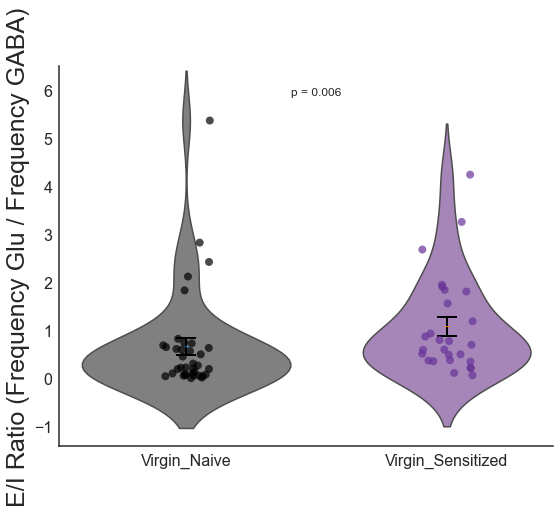

In [89]:
# Generate the plot
plot = create_ei_balance_plot(df_filtered, stats_df, p_value, y_max)
plt.show()

In [114]:
# 2. Create visualization with pre-calculated statistics
def create_ei_balance_plot_publication(df_filtered, stats_df, p_value, y_max):
    # Set figure size and style
    plt.figure(figsize=(8, 6))
    sns.set_style("ticks")

    # Create the violin plot
    ax = sns.violinplot(x="State", y="E_I_ratio", data=df_filtered, 
                       inner=None, palette={"Virgin_Naive": "grey", "Virgin_Sensitized": "xkcd:wisteria"})

    # Set transparency for violin plots
    for violin in ax.collections:
        violin.set_alpha(0.6)

    # Add individual data points
    sns.stripplot(x="State", y="E_I_ratio", data=df_filtered, 
                 jitter=True, size=10, alpha=0.7, palette={"Virgin_Naive": "black", "Virgin_Sensitized": "rebeccapurple"})

    # Add mean ± SEM bars
    for i, state in enumerate(['Virgin_Naive', 'Virgin_Sensitized']):
        if state in stats_df.index:
            mean = stats_df.loc[state, 'mean']
            sem = stats_df.loc[state, 'sem']
            plt.errorbar(i, mean, yerr=sem, fmt='_', ecolor='black', capsize=10, capthick=2, elinewidth=2)

        # Add better significance indicator based on p-value
    if p_value < 0.05:
        # Determine significance level
        if p_value < 0.0001:
            sig_text = "****"
        elif p_value < 0.001:
            sig_text = "***"
        elif p_value < 0.01:
            sig_text = "**"
        else:
            sig_text = "*"
            
        # # Position the significance bar better
        # bar_height = y_max
        # plt.plot([0, 1], [bar_height, bar_height], 'k-', linewidth=1.5)
        # plt.text(0.5, bar_height + (y_max * 0.03), sig_text, 
        #         ha='center', va='bottom', fontsize=20)   

        # Customize the plot with professional styling
        # plt.title('E/I Balance', fontsize=22)
        plt.ylabel('E/I Ratio (Glutamate/GABA)', fontsize=25)
        plt.xlabel('', fontsize=14)
        plt.xticks([0, 1], ['Baseline', 'Sensitized'], fontsize=25)
        plt.yticks(fontsize=20)

        # Remove top and right spines
        sns.despine()

        plt.tight_layout()
        
        return plt

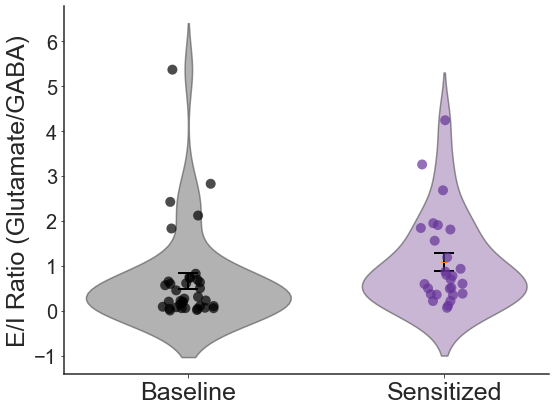

In [115]:
# Generate the plot
plot = create_ei_balance_plot_publication(df_filtered, stats_df, p_value, y_max)


# save the plot as high-resolution images for publication
plt.savefig("ephys_plots/ei_balance_publication_quality.png", dpi=600, bbox_inches='tight', transparent=True)
plt.savefig("ephys_plots/ei_balance_publication_quality.pdf", bbox_inches='tight')

plt.show()

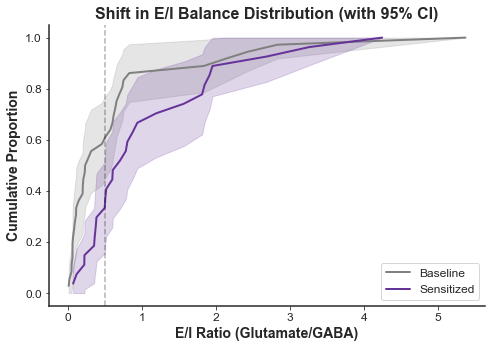

In [32]:
# Create ECDF plot with confidence intervals
plt.figure(figsize=(7, 5))

# Sort the data first
naive_sorted = np.sort(naive_values)
sensitized_sorted = np.sort(sensitized_values)

# Alternative simpler approach for confidence intervals
def simplified_ecdf_ci(data, ci=0.95):
    """Calculate confidence intervals using Greenwood's formula"""
    n = len(data)
    p = np.arange(1, n+1) / n
    
    # Standard error for ECDF (Greenwood's formula)
    se = np.sqrt(p * (1-p) / n)
    
    # Z-score for desired confidence level
    z = stats.norm.ppf(1 - (1-ci)/2)
    
    lower = np.maximum(0, p - z * se)
    upper = np.minimum(1, p + z * se)
    
    return lower, upper

# Generate and plot main ECDF lines
plt.plot(naive_sorted, np.arange(1, len(naive_sorted)+1) / len(naive_sorted), 
         color='gray', linewidth=2, label='Baseline')
plt.plot(sensitized_sorted, np.arange(1, len(sensitized_sorted)+1) / len(sensitized_sorted), 
         color='rebeccapurple', linewidth=2, label='Sensitized')

# Add confidence intervals (95%) with INCREASED ALPHA
naive_lower, naive_upper = simplified_ecdf_ci(naive_values)
sens_lower, sens_upper = simplified_ecdf_ci(sensitized_values)

plt.fill_between(naive_sorted, naive_lower, naive_upper, color='gray', alpha=0.2)  # Increased alpha
plt.fill_between(sensitized_sorted, sens_lower, sens_upper, color='rebeccapurple', alpha=0.2)  # Increased alpha

# Styling
plt.xlabel('E/I Ratio (Glutamate/GABA)', fontsize=14, fontweight='bold')
plt.ylabel('Cumulative Proportion', fontsize=14, fontweight='bold')
plt.title('Shift in E/I Balance Distribution (with 95% CI)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.axvline(x=0.5, color='k', linestyle='--', alpha=0.3)  # Reference line
sns.despine()
plt.tight_layout()

# Save for publication if needed
plt.savefig("ephys_plots/ei_balance_ecdf_with_ci.png", dpi=600, bbox_inches='tight')

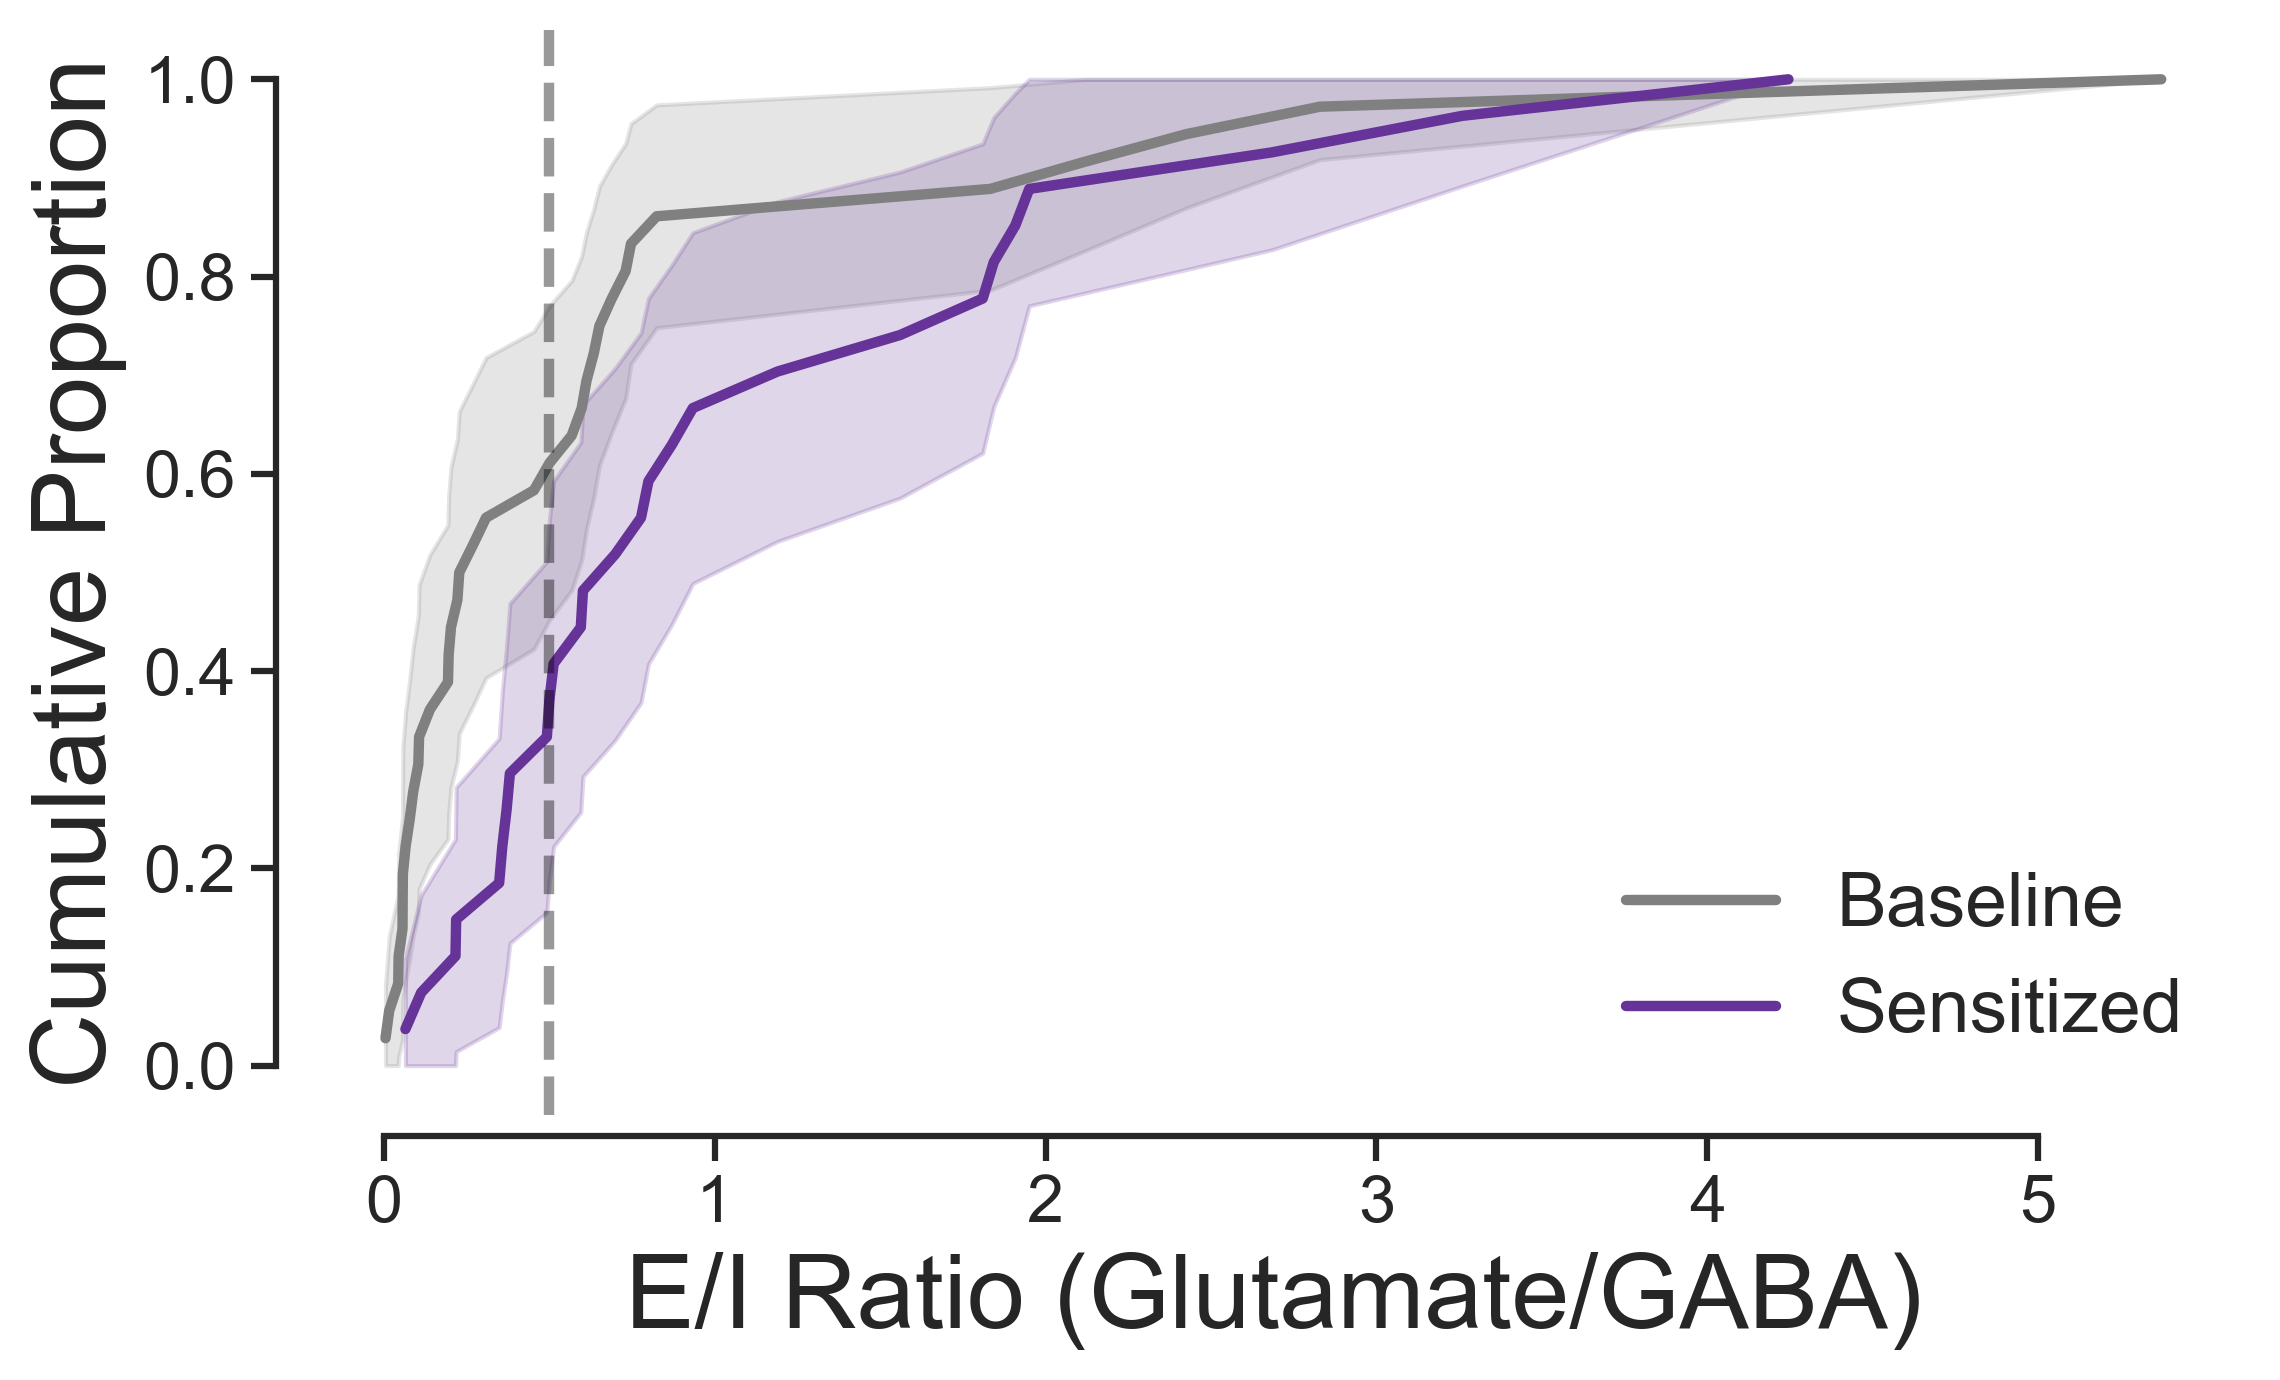

In [117]:
# Create publication-quality ECDF plot with confidence intervals
plt.figure(figsize=(8, 5), dpi=300)  # Larger figure size, higher resolution

# Set fonts for publication
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 20,
    'axes.linewidth': 1.5
})

# Sort the data first
naive_sorted = np.sort(naive_values)
sensitized_sorted = np.sort(sensitized_values)

# Alternative simpler approach for confidence intervals
def simplified_ecdf_ci(data, ci=0.95):
    """Calculate confidence intervals using Greenwood's formula"""
    n = len(data)
    p = np.arange(1, n+1) / n
    
    # Standard error for ECDF (Greenwood's formula)
    se = np.sqrt(p * (1-p) / n)
    
    # Z-score for desired confidence level
    z = stats.norm.ppf(1 - (1-ci)/2)
    
    lower = np.maximum(0, p - z * se)
    upper = np.minimum(1, p + z * se)
    
    return lower, upper

# Generate and plot main ECDF lines with thicker lines
plt.plot(naive_sorted, np.arange(1, len(naive_sorted)+1) / len(naive_sorted), 
         color='gray', linewidth=2.5, label='Baseline')
plt.plot(sensitized_sorted, np.arange(1, len(sensitized_sorted)+1) / len(sensitized_sorted), 
         color='rebeccapurple', linewidth=2.5, label='Sensitized')

# Add confidence intervals (95%) with increased alpha
naive_lower, naive_upper = simplified_ecdf_ci(naive_values)
sens_lower, sens_upper = simplified_ecdf_ci(sensitized_values)

plt.fill_between(naive_sorted, naive_lower, naive_upper, color='gray', alpha=0.2)  # Increased alpha
plt.fill_between(sensitized_sorted, sens_lower, sens_upper, color='rebeccapurple', alpha=0.2)  # Increased alpha

# Reference line
plt.axvline(x=0.5, color='k', linestyle='--', alpha=0.4, linewidth=2.5)  # Reference line

# Enhanced styling for thesis quality
plt.xlabel('E/I Ratio (Glutamate/GABA)', fontsize=25)
plt.ylabel('Cumulative Proportion', fontsize=25)
# plt.title('Shift in E/I Balance Distribution', fontsize=20, fontweight='bold')
plt.legend(fontsize=18, frameon=False, loc='lower right')

# Increase tick label size
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)

# Make the tick marks thicker and longer
ax = plt.gca()
ax.tick_params(width=1.5, length=6, labelsize=16)

# Remove top and right spines
sns.despine(offset=5, trim=True)

# Make remaining spines thicker
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()

# Save for publication with higher resolution
plt.savefig("ephys_plots/ei_balance_ecdf_thesis_quality.png", dpi=600, bbox_inches='tight', transparent=True)
plt.savefig("ephys_plots/ei_balance_ecdf_thesis_quality.pdf", bbox_inches='tight')  # Also save as PDF for vector quality

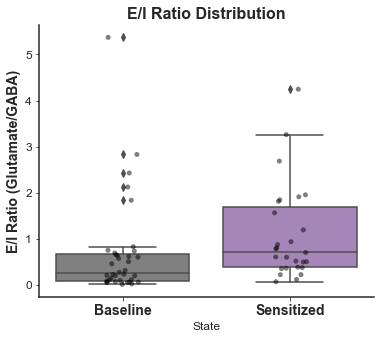

In [24]:
# Show boxplot of e/i ratio by state
plt.figure(figsize=(6, 5))
ax = sns.boxplot(x='State', y='E_I_ratio', data=df_filtered,
             palette={"Virgin_Naive": "grey", "Virgin_Sensitized": "xkcd:wisteria"})
sns.stripplot(x='State', y='E_I_ratio', data=df_filtered, color='black', alpha=0.5, jitter=True)
plt.xticks([0, 1], ['Baseline', 'Sensitized'], fontsize=14, fontweight='bold')
plt.ylabel('E/I Ratio (Glutamate/GABA)', fontsize=14, fontweight='bold')
plt.title('E/I Ratio Distribution', fontsize=16, fontweight='bold')
sns.despine()

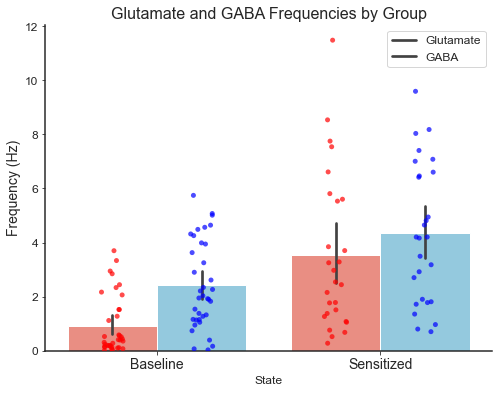

In [33]:
# Create a data frame for plotting
plot_data = df_filtered.melt(id_vars=['State', 'ID_Mice'], 
                            value_vars=['Frequency_Glu', 'Frequency_GABA'],
                            var_name='Neurotransmitter', value_name='Frequency')

# Create grouped bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='State', y='Frequency', hue='Neurotransmitter', data=plot_data,
           palette={"Frequency_Glu": "salmon", "Frequency_GABA": "skyblue"})
sns.stripplot(x='State', y='Frequency', hue='Neurotransmitter', data=plot_data,
             dodge=True, jitter=True, size=5, alpha=0.7, palette={"Frequency_Glu": "red", "Frequency_GABA": "blue"})
plt.xticks([0, 1], ['Baseline', 'Sensitized'], fontsize=14)
plt.ylabel('Frequency (Hz)', fontsize=14)
plt.legend(title='', labels=['Glutamate', 'GABA'])
plt.title('Glutamate and GABA Frequencies by Group', fontsize=16)
sns.despine()

Neurotransmitter Frequency Statistics by State:
               State Frequency_Glu                 Frequency_GABA            \
                              mean       sem count           mean       sem   
0       Virgin_Naive      0.937430  0.174693    37       2.318989  0.264334   
1  Virgin_Sensitized      3.409393  0.547826    28       4.248795  0.486062   

         
  count  
0    38  
1    28  

Percent Changes from Baseline to Sensitized:
Glutamate frequency: 263.7%
GABA frequency: 83.2%


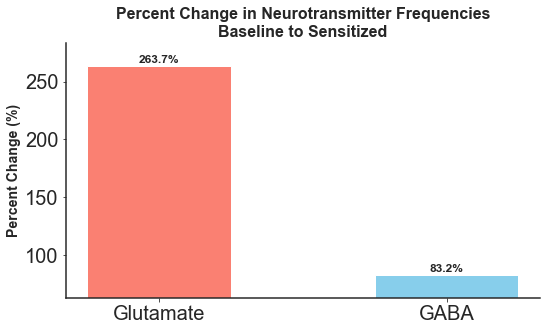

In [118]:
# calculate percent change in glut and gaba frequencies between baseline and sensitized states
# Calculate the mean glutamate and GABA frequencies for each state
neurotransmitter_stats = df.groupby('State')[['Frequency_Glu', 'Frequency_GABA']].agg(['mean', 'sem', 'count']).reset_index()
print("Neurotransmitter Frequency Statistics by State:")
print(neurotransmitter_stats)

# Extract mean values for percent change calculation
naive_glu = neurotransmitter_stats.loc[neurotransmitter_stats['State'] == 'Virgin_Naive', ('Frequency_Glu', 'mean')].values[0]
naive_gaba = neurotransmitter_stats.loc[neurotransmitter_stats['State'] == 'Virgin_Naive', ('Frequency_GABA', 'mean')].values[0]
sens_glu = neurotransmitter_stats.loc[neurotransmitter_stats['State'] == 'Virgin_Sensitized', ('Frequency_Glu', 'mean')].values[0]
sens_gaba = neurotransmitter_stats.loc[neurotransmitter_stats['State'] == 'Virgin_Sensitized', ('Frequency_GABA', 'mean')].values[0]

# Calculate percent changes
glu_percent_change = ((sens_glu - naive_glu) / naive_glu) * 100
gaba_percent_change = ((sens_gaba - naive_gaba) / naive_gaba) * 100

print(f"\nPercent Changes from Baseline to Sensitized:")
print(f"Glutamate frequency: {glu_percent_change:.1f}%")
print(f"GABA frequency: {gaba_percent_change:.1f}%")

# Create a bar plot of percent changes
plt.figure(figsize=(8, 5))
plt.bar(['Glutamate', 'GABA'], [glu_percent_change, gaba_percent_change], 
        color=['salmon', 'skyblue'], width=0.5)

# Add horizontal line at 0% change
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# Add value labels on top of bars
for i, val in enumerate([glu_percent_change, gaba_percent_change]):
    plt.text(i, val + (5 if val > 0 else -15), f"{val:.1f}%", 
             ha='center', va='center', fontsize=12, fontweight='bold')

# Styling
plt.ylabel('Percent Change (%)', fontsize=14, fontweight='bold')
plt.title('Percent Change in Neurotransmitter Frequencies\nBaseline to Sensitized', fontsize=16, fontweight='bold')
plt.ylim(min(glu_percent_change, gaba_percent_change) - 20, max(glu_percent_change, gaba_percent_change) + 20)
sns.despine()
plt.tight_layout()

# Save the plot
# plt.savefig("ephys_plots/neurotransmitter_percent_change.png", dpi=300, bbox_inches='tight')

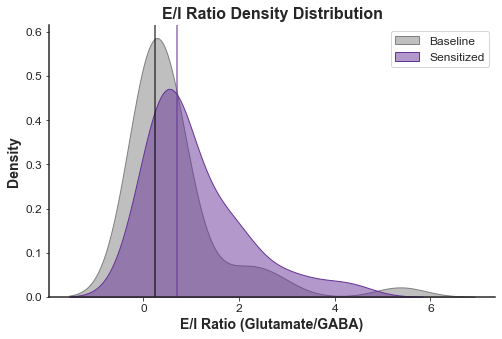

In [ ]:
# Create density plot for E/I ratio
plt.figure(figsize=(8, 5))
sns.kdeplot(naive_values, fill=True, alpha=0.5, color='gray', label='Baseline')
sns.kdeplot(sensitized_values, fill=True, alpha=0.5, color='rebeccapurple', label='Sensitized')
plt.xlabel('E/I Ratio (Glutamate/GABA)', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.title('E/I Ratio Density Distribution', fontsize=16, fontweight='bold')
# Add median lines
plt.axvline(x=naive_values.median(), color='black', linestyle='-', alpha=0.7)
plt.axvline(x=sensitized_values.median(), color='rebeccapurple', linestyle='-', alpha=0.7)
sns.despine()

In [119]:
###### AVERAGE sPSCs TO SHOW INCREASE IN RISE TIME ##########
df = pd.read_excel("/Volumes/lab-kohlj/home/shared/projects/Sensitization/Ephys/EPhys Analysis/MPOAGal 4 days sensitization_V6.xlsx", sheet_name='KGlu')